# **Preparing for Clustering**

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import MeanShift
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN


data = pd.read_csv('complete_dataset_cleaned_new.csv')
data=data.iloc[:,:-2]
data.pop('Pkey')
data.pop('date')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data.head()
data=data[data.location!='Romania']
data=data[data.location!='Latvia']
data=data[data.location!='Estonia']
data=data[data.location!='Ireland']
data=data[data.location!='Switzerland']
data=data[data.location!='Malta']
data=data[data.location!='Bolivia']
data=data[data.location!='Luxembourg']


In [2]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [3]:
data=data.iloc[:,1:]
data2=data.groupby('location').mean()
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
location,,,,,,,,,,,,,,
Algeria,8.481201,0.206925,0.952908,0.972857,60.781769,17.348,13913.839,278.364,6.73,0.7,30.4,1.900,76.88,0.627510
Argentina,304.389088,4.290005,1.002396,70.328470,65.067280,16.177,18933.907,191.032,5.50,16.2,27.7,5.000,76.67,64.814332
Australia,306.161390,0.350011,1.070420,57.819685,60.814389,3.202,44648.710,107.791,5.07,13.0,16.5,3.840,83.44,2.992154
Austria,614.306711,2.889307,1.036171,70.308947,57.125961,106.749,45436.686,145.183,6.35,28.4,30.9,7.370,81.54,26.462721
Belgium,449.537354,3.497184,1.098752,73.733269,51.039678,375.564,42658.576,114.898,4.29,25.1,31.4,5.640,81.63,35.250970
Bulgaria,222.395784,7.096389,1.051510,19.671762,45.520543,65.180,18563.307,424.688,5.81,30.1,44.4,7.454,75.05,46.340991
Canada,130.404463,1.363461,1.028829,74.883921,66.352355,4.037,44017.591,105.599,7.37,12.0,16.6,2.500,82.43,12.847529
Chile,240.015505,3.081262,1.032605,92.988961,65.231000,24.282,22767.037,127.993,8.46,34.2,41.5,2.110,80.18,63.774679
Cyprus,674.099588,1.446419,1.077763,24.241092,59.694382,127.657,32415.132,141.171,9.24,19.6,52.7,3.400,80.98,17.746706


In [4]:
#data.dropna()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit(data2)
c=data2.columns
countries=data2.index

data2 = pd.DataFrame(scaler.transform(data2))

data2.columns=c
data2

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,icu_patients_per_million
0,0.000000,0.022964,0.000000,0.008668,0.833392,0.026957,0.038611,0.552692,0.196629,0.000000,0.405333,2.775558e-17,0.621951,0.000000
1,0.426446,0.602010,0.229148,0.626631,0.961565,0.024725,0.158334,0.310133,0.097913,0.418919,0.333333,2.780269e-01,0.611707,1.000000
2,0.429000,0.043255,0.544132,0.515177,0.834368,0.000000,0.771605,0.078937,0.063403,0.332432,0.034667,1.739910e-01,0.941951,0.036840
3,0.873082,0.403368,0.385543,0.626458,0.724053,0.197321,0.790397,0.182791,0.166132,0.748649,0.418667,4.905830e-01,0.849268,0.402500
4,0.635626,0.489575,0.675317,0.656968,0.542021,0.709579,0.724142,0.098677,0.000803,0.659459,0.432000,3.354260e-01,0.853659,0.539417
5,0.308282,1.000000,0.456568,0.175277,0.376953,0.118106,0.149495,0.959097,0.122793,0.794595,0.778667,4.981166e-01,0.532683,0.712194
6,0.175709,0.186979,0.351546,0.667221,1.000000,0.001591,0.756553,0.072849,0.247994,0.305405,0.037333,5.381166e-02,0.892683,0.190382
7,0.333674,0.430591,0.369032,0.828538,0.966462,0.040170,0.249750,0.135047,0.335474,0.905405,0.701333,1.883408e-02,0.782927,0.983803
8,0.959252,0.198744,0.578133,0.215990,0.800870,0.237163,0.479847,0.171648,0.398074,0.510811,1.000000,1.345291e-01,0.821951,0.266709
9,0.680372,0.692771,0.522017,0.516821,0.508782,0.255303,0.484397,0.411379,0.203852,0.805405,0.616000,4.242152e-01,0.743902,0.618618


In [6]:
X=data2.iloc[:,0:-1]
y=data2.iloc[:,-1]

In [7]:
X

,new_cases_per_million,new_deaths_per_million,reproduction_rate,total_vaccinations_per_hundred,stringency_index,population_density,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy
0,0.000000,0.022964,0.000000,0.008668,0.833392,0.026957,0.038611,0.552692,0.196629,0.000000,0.405333,2.775558e-17,0.621951
1,0.426446,0.602010,0.229148,0.626631,0.961565,0.024725,0.158334,0.310133,0.097913,0.418919,0.333333,2.780269e-01,0.611707
2,0.429000,0.043255,0.544132,0.515177,0.834368,0.000000,0.771605,0.078937,0.063403,0.332432,0.034667,1.739910e-01,0.941951
3,0.873082,0.403368,0.385543,0.626458,0.724053,0.197321,0.790397,0.182791,0.166132,0.748649,0.418667,4.905830e-01,0.849268
4,0.635626,0.489575,0.675317,0.656968,0.542021,0.709579,0.724142,0.098677,0.000803,0.659459,0.432000,3.354260e-01,0.853659
5,0.308282,1.000000,0.456568,0.175277,0.376953,0.118106,0.149495,0.959097,0.122793,0.794595,0.778667,4.981166e-01,0.532683
6,0.175709,0.186979,0.351546,0.667221,1.000000,0.001591,0.756553,0.072849,0.247994,0.305405,0.037333,5.381166e-02,0.892683
7,0.333674,0.430591,0.369032,0.828538,0.966462,0.040170,0.249750,0.135047,0.335474,0.905405,0.701333,1.883408e-02,0.782927
8,0.959252,0.198744,0.578133,0.215990,0.800870,0.237163,0.479847,0.171648,0.398074,0.510811,1.000000,1.345291e-01,0.821951
9,0.680372,0.692771,0.522017,0.516821,0.508782,0.255303,0.484397,0.411379,0.203852,0.805405,0.616000,4.242152e-01,0.743902


In [8]:
count=1

In [9]:
import warnings
warnings.filterwarnings('ignore') # 
kmean_avg_dist, gmm_avg_dist= [],[]


In [10]:
"""sf=[]
for i in X.columns:
  k=KMeans(n_clusters=4)
  d= X[[i]]
  k.fit(d,y)
  pred=k.predict(d)
  s=metrics.silhouette_score(d,pred)
  print("Score for",i,":",s)
  """

'sf=[]\nfor i in X.columns:\n  k=KMeans(n_clusters=4)\n  d= X[[i]]\n  k.fit(d,y)\n  pred=k.predict(d)\n  s=metrics.silhouette_score(d,pred)\n  print("Score for",i,":",s)\n  '

In [11]:
#X=X.iloc[:,[0,1,3,5,6,7,8,11]]

In [12]:
count

1

In [13]:
from sklearn.base import warnings
while (count<8): 
 count=count+1
 # training gaussian mixture model 
 gmm = GaussianMixture(n_components=count)
 gmm.fit(X)
 #predictions from gmm
 labels = gmm.predict(X)
 score_GMM=metrics.silhouette_score(X,labels)
 print("Silhouette score for",count,"clusters:","GMM:",score_GMM)


Silhouette score for 2 clusters: GMM: 0.22962310002784486
Silhouette score for 3 clusters: GMM: 0.1106139578146179
Silhouette score for 4 clusters: GMM: 0.10041922601181293
Silhouette score for 5 clusters: GMM: 0.16988757503829308
Silhouette score for 6 clusters: GMM: 0.1610373782996194
Silhouette score for 7 clusters: GMM: 0.17139383246296963
Silhouette score for 8 clusters: GMM: 0.1773257273235384


In [14]:
count=1
from sklearn.base import warnings
while (count<8): 
 count=count+1
 #training k-means model
 kmeans = KMeans(n_clusters=count)
 kmeans.fit(X)
 #predictions from kmeans
 pred = kmeans.predict(X)
 #frame = pd.DataFrame(X)
 score_Kmeans= metrics.silhouette_score(X,pred)
 kmean_avg_dist.append(kmeans.inertia_)
 print("Silhouette score for",count,"clusters Kmeans:",score_Kmeans)

Silhouette score for 2 clusters Kmeans: 0.1796275773140592
Silhouette score for 3 clusters Kmeans: 0.12190966403499655
Silhouette score for 4 clusters Kmeans: 0.17897749801148816
Silhouette score for 5 clusters Kmeans: 0.21804834883706664
Silhouette score for 6 clusters Kmeans: 0.16587510849060239
Silhouette score for 7 clusters Kmeans: 0.17881802365135854
Silhouette score for 8 clusters Kmeans: 0.1668625689224758


In [16]:
count=1
#from sklearn.base import warnings
#while (count<8): 
# count=count+1
 #training spectral model
spectral = SpectralClustering(n_clusters=4)
spectral.fit(X)
#predictions
sp_labels = spectral.labels_
 
score_SP= metrics.silhouette_score(X,sp_labels)
print("Silhouette score for",4,"clusters Spectral:",score_SP)

Silhouette score for 4 clusters Spectral: 0.2432509811414343


In [18]:
count=1
from sklearn.base import warnings
while (count<8): 
 count=count+1
 #Hierarchical 
 hierarchical_cluster = AgglomerativeClustering(n_clusters=count, affinity='euclidean', linkage='ward')
 hc_labels=hierarchical_cluster.fit_predict(X)
 #frame = pd.DataFrame(X)
 score_HC= metrics.silhouette_score(X,hc_labels)
 print("Silhouette score for",count,"clusters Hierarchical/Agglomerative:",score_HC)


Silhouette score for 2 clusters Hierarchical/Agglomerative: 0.26986712814769226
Silhouette score for 3 clusters Hierarchical/Agglomerative: 0.14969501745968175
Silhouette score for 4 clusters Hierarchical/Agglomerative: 0.18277441437570163
Silhouette score for 5 clusters Hierarchical/Agglomerative: 0.20405755205008816
Silhouette score for 6 clusters Hierarchical/Agglomerative: 0.16906405416902814
Silhouette score for 7 clusters Hierarchical/Agglomerative: 0.17646658681764546
Silhouette score for 8 clusters Hierarchical/Agglomerative: 0.1819989091238386


In [20]:
#training affinity propagation model
ap = AffinityPropagation(preference=-5, damping=0.95)
ap.fit(X)
#predictions from kmeans
ap_labels = ap.predict(X)
metrics.silhouette_score(X,ap_labels)

ValueError: ignored

In [21]:
#training means shift model
ms = MeanShift()
ms.fit(X)
#predictions from kmeans
ms_labels = ms.predict(X)
metrics.silhouette_score(X,ms_labels)


0.21352573139391853

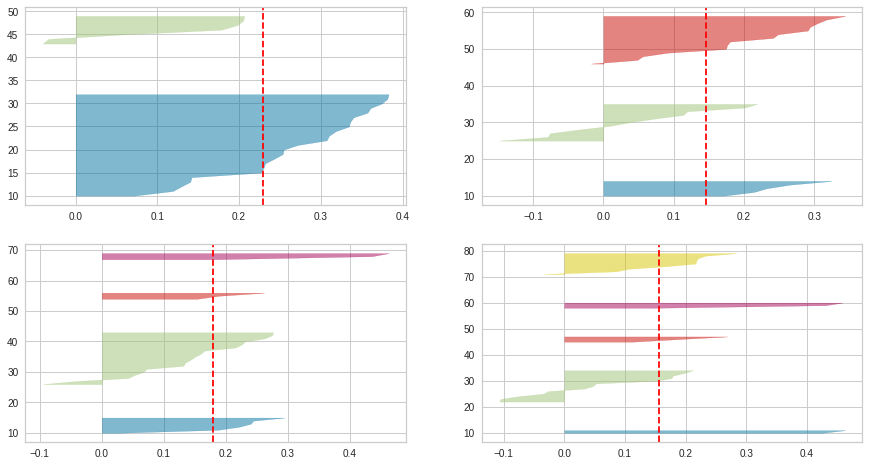

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X)

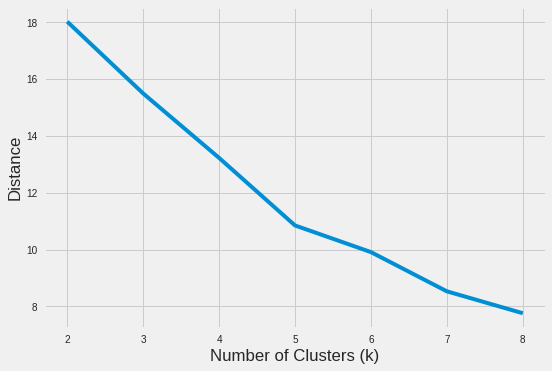

In [23]:
range_n_clusters=[2,3,4,5,6,7,8]
import matplotlib.style as style
style.use("fivethirtyeight")
plt.plot(range_n_clusters, kmean_avg_dist)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

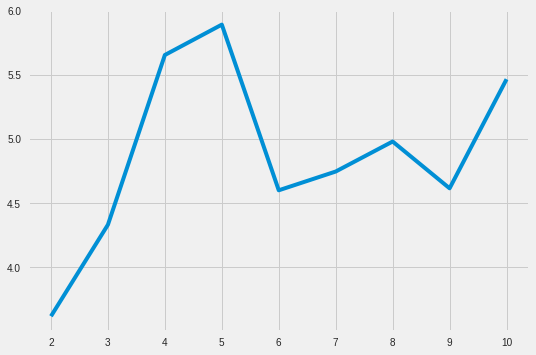

In [24]:
from sklearn.metrics import calinski_harabasz_score
scores = pd.DataFrame()
components = 11
for n in range(2,components):
    model = GaussianMixture(n_components=n)
    y = model.fit_predict(X)
    scores.loc[n,'score'] = calinski_harabasz_score(X,y)
plt.plot(scores.reset_index()['index'],scores['score'])

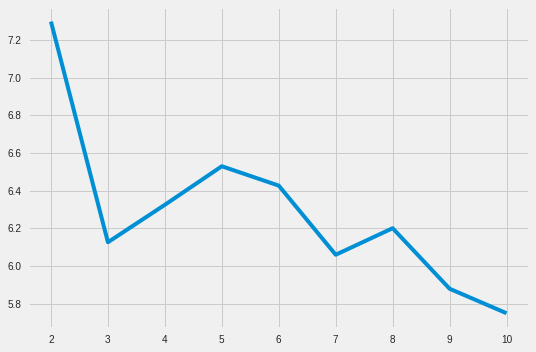

In [25]:
from sklearn.metrics import calinski_harabasz_score
scores = pd.DataFrame()
components = 11
for n in range(2,components):
    model = KMeans(n_clusters=n)
    y = model.fit_predict(X)
    scores.loc[n,'score'] = calinski_harabasz_score(X,y)
plt.plot(scores.reset_index()['index'],scores['score'])

In [26]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
#predictions from kmeans
pred = kmeans.predict(X)
gmm=GaussianMixture(n_components=3)
gmm.fit(X,y)
#predictions from gmm
labels = gmm.predict(X)
cluster=pd.DataFrame(data={'country':countries,'Kmeans':pred,'GMM':labels})
cluster

,country,Kmeans,GMM
0,Algeria,1,2
1,Argentina,1,2
2,Australia,0,0
3,Austria,2,1
4,Belgium,2,1
5,Bulgaria,1,2
6,Canada,0,0
7,Chile,1,1
8,Cyprus,2,1
9,Czechia,2,1


In [27]:
centers=pd.DataFrame(kmeans.cluster_centers_)

In [28]:
centers

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.461126,0.242821,0.522108,0.374128,0.565382,0.085177,0.729109,0.122714,0.214018,0.457057,0.171259,0.092476,0.876802
1,0.347326,0.452557,0.365811,0.312068,0.723655,0.103331,0.176262,0.547089,0.319924,0.491554,0.586333,0.189608,0.546159
2,0.693538,0.355846,0.512092,0.563402,0.647477,0.503285,0.623810,0.127325,0.154340,0.561123,0.490667,0.373715,0.873884


In [29]:
from numpy.ma.extras import average
cluster=cluster.groupby('country').mean()
cluster

,Kmeans,GMM
country,,
Algeria,1.0,2.0
Argentina,1.0,2.0
Australia,0.0,0.0
Austria,2.0,1.0
Belgium,2.0,1.0
Bulgaria,1.0,2.0
Canada,0.0,0.0
Chile,1.0,1.0
Cyprus,2.0,1.0


In [30]:
data = pd.read_csv('complete_dataset_cleaned.csv')
data=data.iloc[:,:-3]
data.pop('Pkey')
data.pop('date')
data.pop('human_development_index')
data.pop('gdp_percentage_weekly')
data=data[data.location!='Bolivia']
data=data[data.location!='Luxembourg']
data4=data.groupby('location').mean()


FileNotFoundError: ignored

In [ ]:
unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')
unclean_data

In [ ]:
data2=unclean_data.groupby('location').mean()

In [ ]:
#data2=unclean_data.iloc[:,3:]
#data2.head()

In [ ]:
data2

In [ ]:
Ind=pd.DataFrame(data2[data2.index=='India'])
Ind

In [ ]:
ind=kmeans.predict(Ind.iloc[:,:-1])
ind=int(ind)
c_countries= cluster.index[cluster.Kmeans==ind]
c_countries

In [ ]:
dist=[]
from scipy.spatial import distance
for c in c_countries:
  a=data4[data4.index==c]
  b=centers.iloc[1,:]
  dst = distance.euclidean(a, b)
  dist.append(dst)
  i=i+1

In [ ]:
dst_center=pd.DataFrame(dist,c_countries)
dst_center

In [ ]:
dst_center.columns=['distance']
dst_center=dst_center.sort_values(by=['distance'])
dst_center=dst_center.iloc[:2,:]
dst_center

# **Predictions**

In [ ]:
data = pd.read_csv('complete_dataset_cleaned.csv')

In [ ]:
c_countries=list(dst_center.index)
c_countries

In [ ]:
data_new=data.loc[data['location'].isin(c_countries)]

In [ ]:
data=data_new.iloc[:,:-2]
data.pop('Pkey')
data.set_index('date', inplace=True)
data.pop('human_development_index')
data.head()

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
data=data.iloc[:,1:]
data.pop('population_density')
data.pop('gdp_per_capita')
data.pop('cardiovasc_death_rate')
data.pop('diabetes_prevalence')
data.pop('female_smokers')
data.pop('male_smokers')
data.pop('hospital_beds_per_thousand')
data.pop('life_expectancy')
df=data
df

In [ ]:
i=1
d=[]
for c in c_countries:
 temp=data[data['location']==c]
 d.append(temp)
 i=i+1

In [ ]:
d[0]

# **Plot Your Data**

In [ ]:
i=0
for c in c_countries:
  d[i].icu_patients_per_million.plot(figsize=(12,5), label=c)
  plt.legend(loc="upper right")
  i=i+1

# **Check For Stationarity**

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [ ]:
adf_test(df['icu_patients_per_million'])

# **Figure Out Order for ARIMA Model**

In [ ]:
pip install pmdarima

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

#Analysis of First Country in Cluster**

In [ ]:
"""data1=d[0]
data1.pop('location')
data1=clean_dataset(data1)

data2=d[1]
data2.pop('location')
data2=clean_dataset(data2)
"""

In [ ]:
print(data1.shape)
train1=data1.iloc[:-30,:]
test1=data1.iloc[-30:,:]
print(train1.shape,test1.shape)
#print(test.iloc[0],test.iloc[-1])
print(data2.shape)
train2=data2.iloc[:-30,:]
test2=data2.iloc[-30:,:]
print(train2.shape,test2.shape)


## **Train the Models**

In [ ]:
unclean_data=pd.read_csv('complete_dataset_uncleaned.csv')
data3=unclean_data[unclean_data.location=='India']
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()
data3=data3.iloc[:,:-1]
data3=data3.dropna()
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]

In [ ]:
i=0
a=['1','2','3','4','5','6','7','8','9','10']
pred=['1','2','3','4','5','6','7','8','9','10']
from sklearn.metrics import mean_squared_error
from math import sqrt
for c in c_countries:
  print(d[i].location[1])
  train=d[i].iloc[:-30,:]
  test=d[i].iloc[-30:,:]
  print(train.shape,test.shape)
  a[i]=auto_arima(y=train['icu_patients_per_million'],X=train.iloc[:,1:6], m=10 , max_d=4,max_q=2 ,trace=True, seasonal=True,suppress_warnings=True )
  start=len(train)
  end=len(train)+len(test)-1
  pred[i]=a[i].predict(len(testi.iloc[:,0:5]),X=testi.iloc[:,0:5])
  pred[i].index=d[i].index[start:end+1]
  print(pred[i])
  rmse=sqrt(mean_squared_error(pred[i],test['icu_patients_per_million']))
  print(rmse)
  i=i+1

In [ ]:
i=0
pred=list(pred)
for c in c_countries:
  pred[i].plot(figsize=(20,5), label=c)
  plt.legend(loc="upper right")
  i=i+1

In [ ]:
"""start=len(train)
end=len(train)+len(test)-1"""

In [ ]:
"""pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))"""

In [ ]:
"""pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)"""

In [ ]:
#test['icu_patients_per_million'].mean()

##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(100, input_dim=7, activation="tanh"))
model.add(Dense(50,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann**

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:23,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

In [ ]:
pred_final

##**Predicting for new country**


In [ ]:
data3=unclean_data[unclean_data.location=='India']

In [ ]:
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()

In [ ]:
data3=data3.iloc[:,:-1]
data3=data3.dropna()
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,2,1),seasonal_order=(1,0,0,30) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=data3.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [ ]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


## **Calculating the sum of prediction value by arima and amount error by the ann**

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])
pred_final = pd.DataFrame(pred_final)

#plt.plot(pred_final , color = 'r')
#plt.show()

In [ ]:
pred_final

In [ ]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()

# **Analyis of the second country**

In [ ]:
data_bulg=d[0]
data_bulg.pop('location')
data_bulg=clean_dataset(data_bulg)
data_bulg

In [ ]:
stepwise_fit = auto_arima(data_bulg['icu_patients_per_million'],exog=data_bulg.iloc[:,0:5], start_P=1,start_Q=1, start_D=1, m=14  ,trace=True, seasonal=True,
                          suppress_warnings=True)

In [ ]:
print(data_bulg.shape)
train=data_bulg.iloc[:-30,:]
test=data_bulg.iloc[-30:,:]
print(train.shape,test.shape)
#print(test.iloc[0],test.iloc[-1])

## **Train the Model**

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,2,1),seasonal_order=(1,0,0,30) )
modela=modela.fit()
modela.summary()

In [ ]:
start=len(train)
end=len(train)+len(test)-1

In [ ]:
pred=modela.predict(exog=test.iloc[:,0:5],start=start,end=end)
pred.index=df.index[start:end+1]
print(len(pred))

In [ ]:
pred.plot(legend='ARIMA Predictions')
test['icu_patients_per_million'].plot(legend=True)

In [ ]:
test['icu_patients_per_million'].mean()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['icu_patients_per_million']))
print(rmse)

## **PREPING DATA FOR ANN**


In [ ]:
predicted_list, error_list = [], []
training_data = train
modela = ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(5,1,1),seasonal_order=(1,0,1,30))
model_fit = modela.fit()
for t in range(len(test)):
    predicted_value = pred[t]
    error_list.append(test.iloc[t,-1] - predicted_value)
    predicted_list.append(predicted_value)
    obs = test.iloc[t,-1]
    training_data[t]=obs
    
error = mean_squared_error(test.iloc[0:30,-1], predicted_list[0:30])
print('Test MSE: %.3f' % error)
training_error = model_fit.resid
training_error=np.array(training_error)

##**Building ann model to predict error by seeing the previous 7 day error in prediction**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error as mse

model = Sequential()
model.add(Dense(100, input_dim=7, activation="tanh"))
model.add(Dense(50,  activation="tanh"))
model.add(Dense(25,  activation="tanh"))
model.add(Dense(1))
model.add(Activation("linear"))
model.compile(loss='mean_squared_error', optimizer='adam')
train_X,train_Y = [],[]
for i in range(0 , len(training_error) - 7):
    train_X.append(training_error[i:i+7])
    train_Y.append(training_error[i+7])

train_X=np.array(train_X)
train_Y=np.array(train_Y)
new_train_X,new_train_Y = [],[]
for i in train_X:
    new_train_X.append(i.reshape(-1)) 
for i in train_Y:
    new_train_Y.append(i.reshape(-1))
new_train_X = np.array(new_train_X)
new_train_Y = np.array(new_train_Y)
model.fit(new_train_X,new_train_Y, epochs=400, batch_size=20,verbose=1)
test_data = []
for i in error_list:
    try:
        test_data.append(i[0])
    except:
        test_data.append(i)
test_data = np.array(test_data)

In [ ]:
test_X,test_Y = [],[]
for i in range(0 , len(test_data) - 7):
    test_X.append(test_data[i:i+7])
    test_Y.append(test_data[i+7])

new_test_X,new_test_Y = [],[]
for i in test_X:
    new_test_X.append(i.reshape(-1))
for i in test_Y:
    new_test_Y.append(i.reshape(-1))
new_test_X = np.array(new_test_X)
new_test_Y = np.array(new_test_Y)

predictions = model.predict(new_test_X)

Y = pd.DataFrame(new_test_Y)
pred = pd.DataFrame(predictions)

import matplotlib.pyplot as plt
plt.plot(predictions , color = 'r')
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

In [ ]:
plt.plot(Y)
plt.plot(pred , color = 'r')
#p.plot()
plt.show()
error = mse(test_data[7:],predictions)
print('Test MSE: %.3f' % error)

##**Calculating the sum of prediction value by arima and amount error by the ann**

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predicted_list[i]
 pred_final.append(temp)
error = mse(test.iloc[:23,-1],pred_final)
print('Test MSE: %.3f' % error)
Y = pd.DataFrame(test.iloc[7:,-1])
pred = pd.DataFrame(pred_final)
plt.plot(Y)
plt.plot(pred , color = 'r')
plt.rcParams['figure.figsize'] = [20, 5]
#p.plot()
plt.show()

In [ ]:
pred_final

##**Predicting for new country**


In [ ]:
data3=unclean_data[unclean_data.location=='India']

In [ ]:
data3=data3.iloc[:,2:]
data3.pop('location')
data3.pop('population_density')
data3.pop('gdp_per_capita')
data3.pop('cardiovasc_death_rate')
data3.pop('diabetes_prevalence')
data3.pop('female_smokers')
data3.pop('male_smokers')
data3.pop('hospital_beds_per_thousand')
data3.pop('life_expectancy')
data3.set_index('date', inplace=True)
data3.tail()

In [ ]:
data3=data3.iloc[:,:-1]
data3=data3.dropna()
traini=data3.iloc[:-30,:]
testi=data3.iloc[-30:,:]

In [ ]:
modela=ARIMA(endog=train['icu_patients_per_million'],exog=train.iloc[:,0:5] ,order=(0,2,1),seasonal_order=(1,0,0,30) )
modela=modela.fit()
modela.summary()
start=len(traini)
end=len(traini)+len(testi)-1
pred=modela.predict(exog=testi.iloc[:,0:5],start=start,end=end)
pred.index=data3.index[start:end+1]
pred.plot(legend='ARIMA Predictions')

In [ ]:
pred=pd.DataFrame(pred)
pred=pred.iloc[7:,:]
predictions=pd.DataFrame(predictions)
predictions.values.tolist()
predictions=predictions[0]
predictions.values.tolist()
predictions


## **Calculating the sum of prediction value by arima and amount error by the ann**

In [ ]:
pred=np.array(pred)
pred= pred.tolist()
l= len(pred)
pred_final=[]
for i in range(l):
 temp = pred[i] + predictions[i]
 pred_final.append(temp)
 print(temp)
#error = mse(test.iloc[:23,-1],pred_final)
#print('Test MSE: %.3f' % error)
#Y = pd.DataFrame(testi.iloc[7:,-1])
pred_final = pd.DataFrame(pred_final)

#plt.plot(pred_final , color = 'r')
#plt.show()

In [ ]:
pred_final

In [ ]:
plt.plot(pred_final , label="ARIMA+ANN", color = 'r')
plt.plot(pred , label="ARIMA", color = 'b')

plt.show()